# A session of REPL / C++ with opencv
Load, display and manipulate images with opencv. Demonstrates how to load an external library and display advanced items.

<a href="."><img src="data/all_notebooks.svg" align="right"></a>

In [1]:
#include "init.opencv.cpp"
// Then use it
cv::Mat lena = cv::imread("data/lena.jpg");
cv::resize(lena, lena, cv::Size(375, 183))

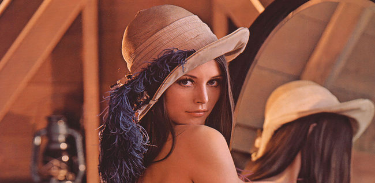

In [2]:
im::show(lena) 

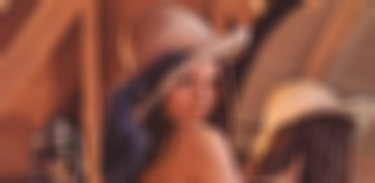

In [3]:
cv::Mat blur;
cv::blur(lena, blur, cv::Size(15, 15));
im::show(blur)

# How this is done

[init.opencv.cpp](init.opencv.cpp) will init opencv (include headers, load libs, and define `im::show(const cv::Mat &)`
````cpp
#pragma cling add_library_path("/srv/conda/lib/")
#pragma cling add_include_path("   /srv/conda/include")
#pragma cling load("libopencv_core")
#pragma cling load("libopencv_imgcodecs")
#pragma cling load("libopencv_imgproc")

#include <opencv2/core/core.hpp>
#include <opencv2/highgui/highgui.hpp>
#include <opencv2/imgproc/imgproc.hpp>
#include "xtl/xbase64.hpp"
#include "nlohmann/json.hpp"

namespace im
{
    struct matshow
    {
        matshow(const cv::Mat& m) : _mat(m) {}
        cv::Mat _mat;
    };;
    
    matshow show(const cv::Mat& m) { matshow r(m); return r; }

    nlohmann::json mime_bundle_repr(const matshow& m)
    {
        std::vector<uchar> buf;
        bool success =  cv::imencode(".png", m._mat, buf);
        if (success) {
            auto bundle = nlohmann::json::object();
            std::string buf_as_str(buf.begin(), buf.end());
            bundle["image/jpeg"] = xtl::base64encode(buf_as_str);
            return bundle;
        }
        else
            return {};
    }
}
````

 It is inspired by the page [Displaying rich content](https://xeus-cling.readthedocs.io/en/latest/rich_display.html) on the xeus documentation site.